In [1]:
#Inicialização
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math as m
from IPython.display import Image

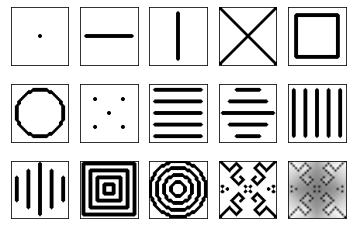

In [2]:
#Imagens básicas como entrada
img00 = cv.imread("../gcPDI/imgSimple/00sDot.png",0)
img01 = cv.imread("../gcPDI/imgSimple/01sHorizontal.png",0)
img02 = cv.imread("../gcPDI/imgSimple/02sVertical.png",0)
img03 = cv.imread("../gcPDI/imgSimple/03sX.png",0)
img04 = cv.imread("../gcPDI/imgSimple/04sSquare.png",0)
img05 = cv.imread("../gcPDI/imgSimple/05sCircle.png",0)
img10 = cv.imread("../gcPDI/imgSimple/10mDots.png",0)
img11 = cv.imread("../gcPDI/imgSimple/11mHorizontals.png",0)
img12 = cv.imread("../gcPDI/imgSimple/12mHorizontals2.png",0)
img13 = cv.imread("../gcPDI/imgSimple/13mVerticals.png",0)
img14 = cv.imread("../gcPDI/imgSimple/14mVerticals2.png",0)
img15 = cv.imread("../gcPDI/imgSimple/15mSquares.png",0)
img16 = cv.imread("../gcPDI/imgSimple/16mCircles.png",0)
img20 = cv.imread("../gcPDI/imgSimple/20random.png",0)
img21 = cv.imread("../gcPDI/imgSimple/21colorRandom.png",0)
simpleImg = [img00, img01, img02, img03, img04, img05, img10, img11, img12, img13, img14, img15, img16, img20, img21]              
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(simpleImg[i],cmap='gray')
    plt.xticks([]),plt.yticks([])
plt.show()

## Média
(Normalized Box Filter, Mean Filtering, Smoothing, Averaging, Box Filtering)

### Teoria

Comparativamente com outros métodos, o **Filtro Média** é dito como ótimo para reduzir ruídos aleatórios no domínio do espaço mas é péssimo para o domínio da frequência pela pouca habilidadde de separar uma banda de frequências de outra. Uma vantagem está na simplicidade de implementação.

Seu funcionamento se dá em substituir cada valor de pixel em uma imagem pelo valor médio de seus vizinhos, incluindo ele mesmo. Isso acaba eliminando valores de pixel que não são representativos de seus arredores.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a1b3fadc7b147cf0904a66d9521b55df701eafd9">
<p style="font-size:10px;">Fonte: Wikipedia</p>

A intenção do seu uso está na necessidade de exibir apenas partes de interesse de uma imagem, determinado pela máscara *kernel* que se assemelha a uma integral no domínio do tempo discreto.

### Manipulações com OpenCV

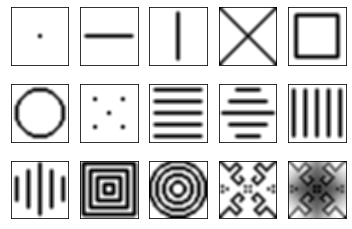

In [3]:
#Filtro Média usando cv.blur
for i in range(15):
    dst = cv.blur(simpleImg[i], ksize=(5, 5)) #Convolução da imagem (aImg0[i]), com mesmo ddepth da imagem (-1), com o kernel.
    plt.subplot(3,5,i+1)
    plt.imshow(dst,cmap='gray')
    plt.xticks([]),plt.yticks([])
plt.show()

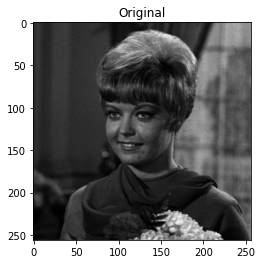

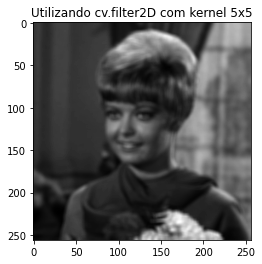

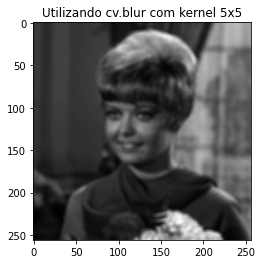

In [4]:
img = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(img,cmap="gray")
plt.title("Original")
plt.show()

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst,cmap="gray")
plt.title("Utilizando cv.filter2D com kernel 5x5")
plt.show()

dst = cv.blur(img, ksize=(5, 5))
plt.imshow(dst,cmap="gray")
plt.title("Utilizando cv.blur com kernel 5x5")
plt.show()

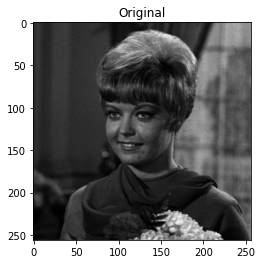

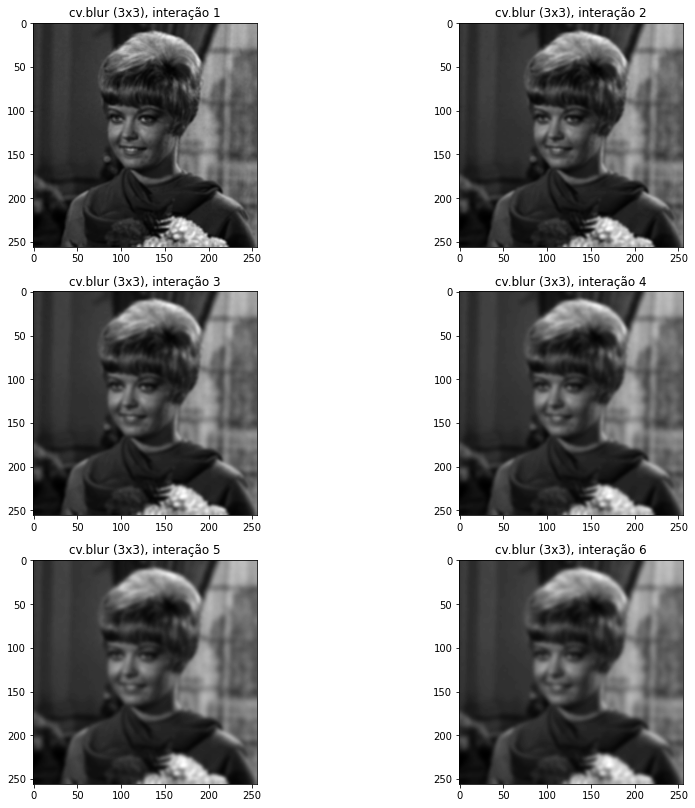

In [5]:
#Aplicação de um kernel 3 x 3
imgblur = img
plt.imshow(imgblur,"gray")
plt.title("Original")
plt.show()
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)
for i in range(6):
    imgblur = cv.blur(imgblur, ksize=(3, 3))  
    f.set_figheight(10)
    f.set_figwidth(10)    
    if i < 2 :
        axarr[0, i].imshow(imgblur,"gray")
        axarr[0, i].set_title("cv.blur (3x3), iteração {}".format(i+1))
    elif i < 4 :
        axarr[1, i-2].imshow(imgblur,"gray")
        axarr[1, i-2].set_title("cv.blur (3x3), iteração {}".format(i+1))
    else :
        axarr[2, i-4].imshow(imgblur,"gray")
        axarr[2, i-4].set_title("cv.blur (3x3), iteração {}".format(i+1))
plt.show()

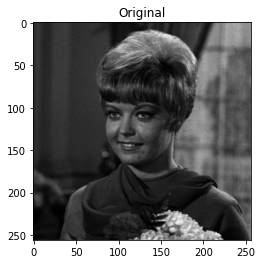

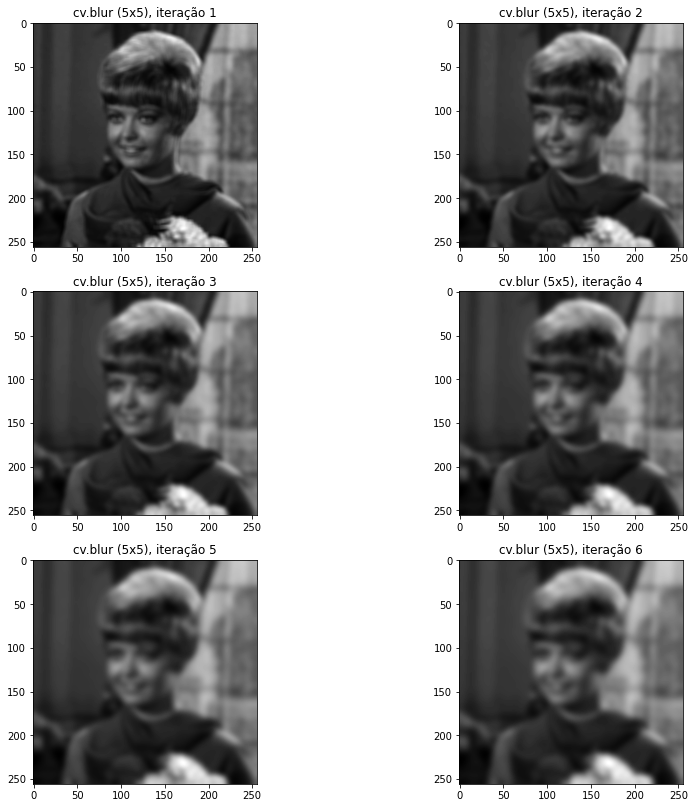

In [6]:
#Aplicação de um kernel 5 x 5
imgblur = img
plt.imshow(imgblur,"gray")
plt.title("Original")
plt.show()
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)
for i in range(6):
    imgblur = cv.blur(imgblur, ksize=(5, 5))  
    f.set_figheight(14)
    f.set_figwidth(14)    
    if i < 2 :
        axarr[0, i].imshow(imgblur,"gray")
        axarr[0, i].set_title("cv.blur (5x5), iteração {}".format(i+1))
    elif i < 4 :
        axarr[1, i-2].imshow(imgblur,"gray")
        axarr[1, i-2].set_title("cv.blur (5x5), iteração {}".format(i+1))
    else :
        axarr[2, i-4].imshow(imgblur,"gray")
        axarr[2, i-4].set_title("cv.blur (5x5), iteração {}".format(i+1))
plt.show()

### Desenvolvimento do Filtro

A máscara *kernel* realizará uma operação semelhante a uma integral no domínio do tempo discreto.

$$g(x,y) = \frac{\sum_{ki = 0}^{N}\sum_{kj = 0}^{M} w(ki, kj)f(i+ki, j+kj)}{NxM}$$

+ $i$ e $j$: Pixel em questão da imagem.
+ $N$ e $M$: Representa o tamanho da máscara.
+ $g(x,y)$ :Novo ponto da imagem.
+ $w$ : Matriz unitária da máscara. 

Essa é a representação de operação da "integração" no domínio discreto 2D em torno do pixel.

A operação desse filtro ao longo da imagem pode ser entendida como a convolução de dois sinais bi-dimensionais discretos:

$$ w*f = \sum_{n = 0}^{N}\sum_{m = 0}^{M}f[x,y]g[x-n,y-m] $$

#### Exemplo com "glitch.jpg"

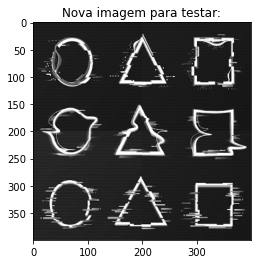

In [7]:
A = cv.imread("../gcPDI/imgMy/glitch.jpg",0) #Nova Imagem Alvo
plt.imshow(A,"gray")
plt.title("Nova imagem para testar:")
plt.show()

In [8]:
Fsize=5 #Dimensão do Kernel (Input)
Alin, Acol = A.shape #Dimensões da Imagem
Fkernel = np.ones([Fsize,Fsize]) #Kernel preenchido
print(Fkernel)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


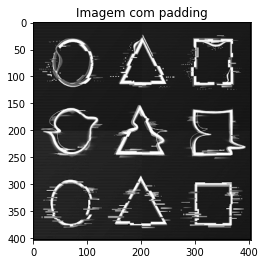

In [9]:
central = m.floor((Fsize/2))
C = np.zeros((Alin + central * 2, Acol + central * 2)) #Cria uma imagem com padding
C[(0 + central):(Alin + central), (0 + central):(Acol + central)] = A.copy() #Cria uma cópia de A com padding

plt.imshow(C,"gray")
plt.title("Imagem com padding")
plt.show()

In [10]:
valsum = 0
D = np.zeros(A.shape)
Dhalf = A.copy() #Variável utilizada para "Split Preview", copy() para efetivamente copiar os valores.
for j in range((0), Alin):    
    for k in range((0), Acol):
            # Run kernel in one matrix's elements
        for kl in range(0, Fsize):
            for kk in range(0, Fsize):
                valsum = (C[j + kl, k + kk] * Fkernel[kl, kk]) + valsum

        value = m.ceil((valsum / (Fsize * Fsize)))
        valsum = 0
        D[j, k] = value
        
        #Efeito de Split Preview
        if k == m.floor((Alin/2)):
            Dhalf[j,k] = 0
        if k > m.floor((Alin/2)):
            Dhalf[j,k] = value
D = np.uint8(D)
Dhalf = np.uint8(Dhalf)            

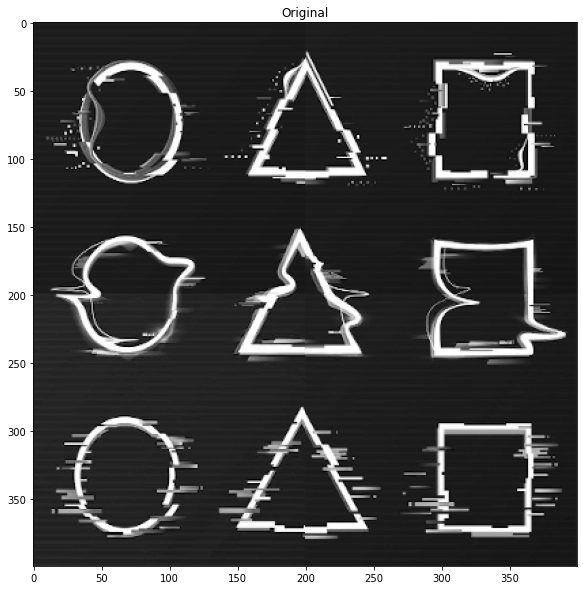

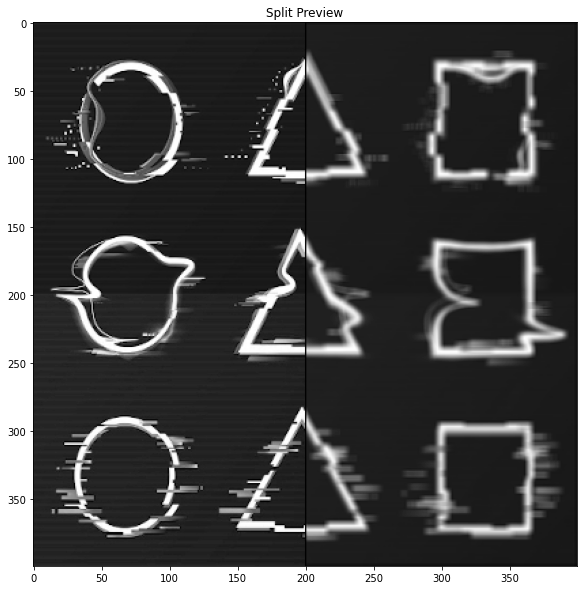

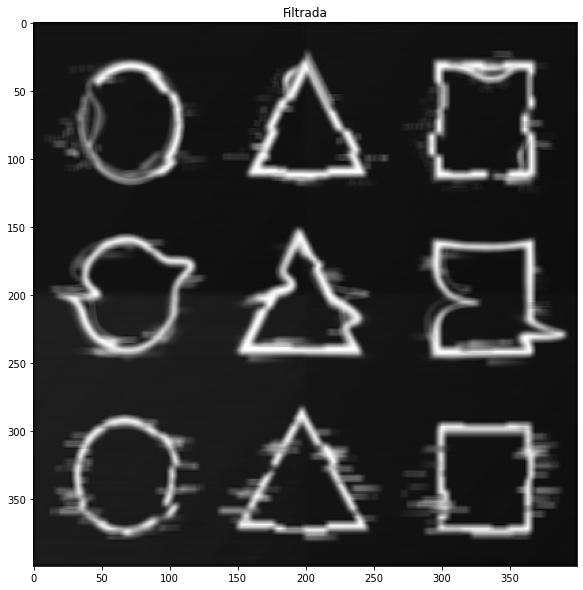

In [11]:
#Plotagem das imagens
#Figura Original
fig1 = plt.figure(1)
fig1.set_figheight(7)
fig1.set_figwidth(7)
plt.imshow(A,"gray")
plt.title("Original")
plt.show()
fig2 = plt.figure(2)
fig2.set_figheight(7)
fig2.set_figwidth(7)
plt.imshow(Dhalf,"gray")
plt.title("Split Preview")
plt.show()
#Figura Filtrada
fig3 = plt.figure(3)
fig3.set_figheight(7)
fig3.set_figwidth(7)
plt.imshow(D,"gray")
plt.title("Filtrada")
plt.show()

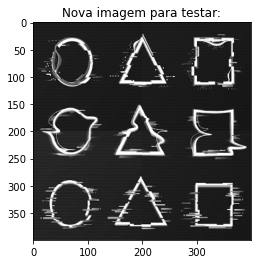

Iteração -> 1


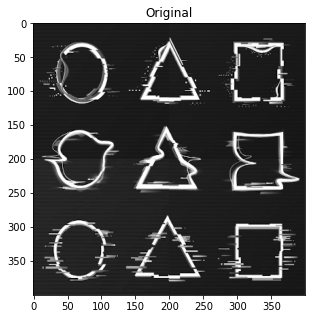

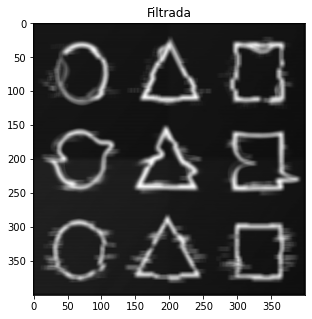

Iteração -> 2


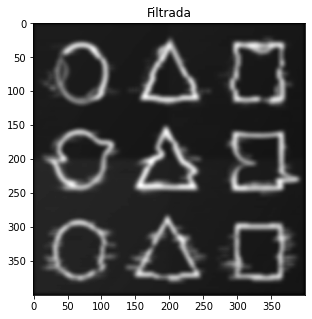

Iteração -> 3


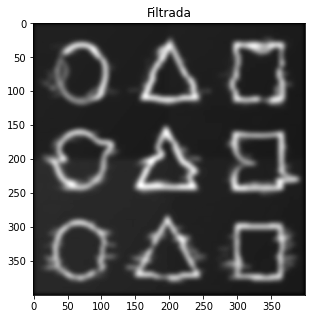

Iteração -> 4


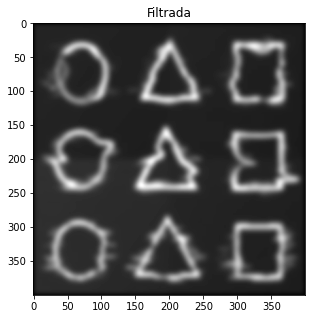

Iteração -> 5


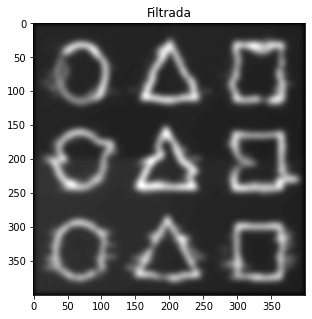

Iteração -> 6


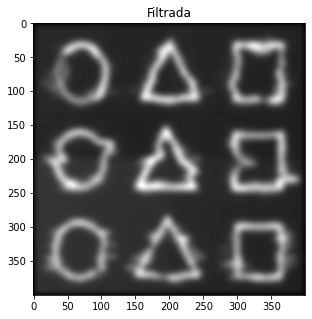

Iteração -> 7


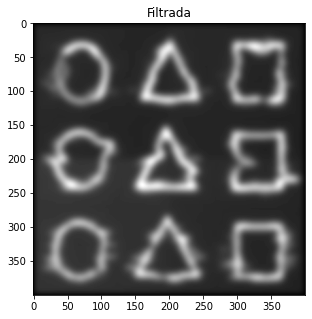

In [12]:
#Exibição Recursiva 01
A = cv.imread("../gcPDI/imgMy/glitch.jpg",0) #Nova Imagem Alvo
plt.imshow(A,"gray")
plt.title("Nova imagem para testar:")
plt.show()
Nits=7 #Número de iteração
Fsize=7 #Dimensão do Kernel (Input)
Alin, Acol = A.shape #Dimensões da Imagem
Fkernel = np.ones([Fsize,Fsize]) #Kernel preenchido
central = m.floor((Fsize/2))
C = np.zeros((Alin + central * 2, Acol + central * 2)) #Cria uma imagem com padding
for nit in range(Nits):
    print("Iteração -> {}".format(nit+1))
    C[(0 + central):(Alin + central), (0 + central):(Acol + central)] = A.copy() #Cria uma cópia de A com padding    
    valsum = 0
    D = np.zeros(A.shape)
    for j in range((0), Alin):    
        for k in range((0), Acol):
                # Run kernel in one matrix's elements
            for kl in range(0, Fsize):
                for kk in range(0, Fsize):
                    valsum = (C[j + kl, k + kk] * Fkernel[kl, kk]) + valsum

            value = m.ceil((valsum / (Fsize * Fsize)))
            valsum = 0
            D[j, k] = value

    D = np.uint8(D)
    if nit == 0:
        fig1 = plt.figure(1)
        fig1.set_figheight(5)
        fig1.set_figwidth(5)
        plt.imshow(A,"gray")
        plt.title("Original")
        plt.show()
    #Figura Filtrada
    fig3 = plt.figure(3)
    fig3.set_figheight(5)
    fig3.set_figwidth(5)
    plt.imshow(D,"gray")
    plt.title("Filtrada")
    plt.show()
    A=D.copy()

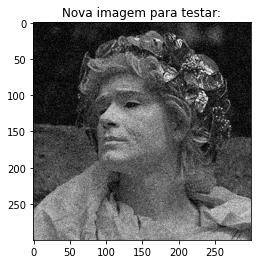

Iteração -> 1


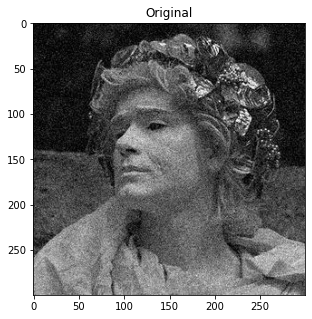

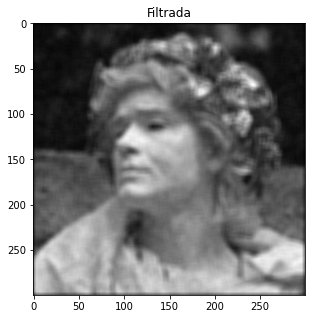

Iteração -> 2


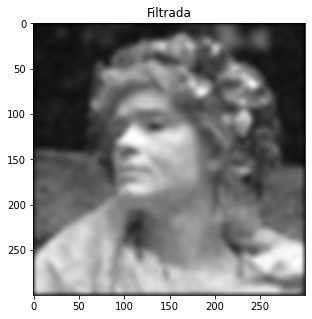

Iteração -> 3


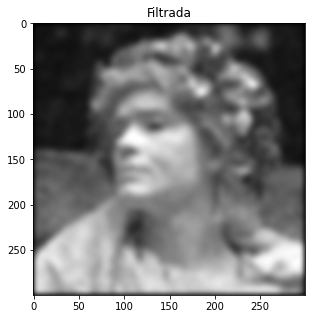

Iteração -> 4


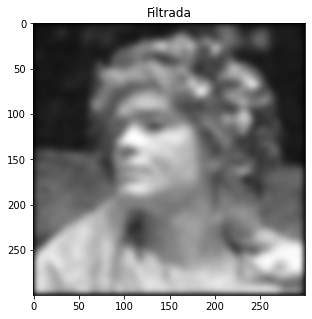

Iteração -> 5


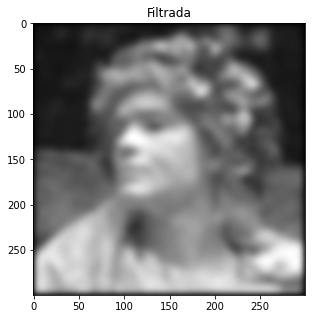

Iteração -> 6


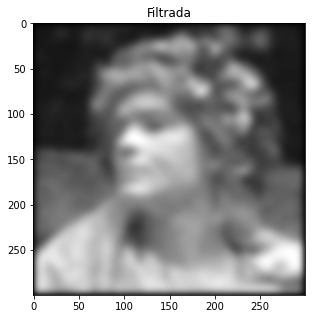

Iteração -> 7


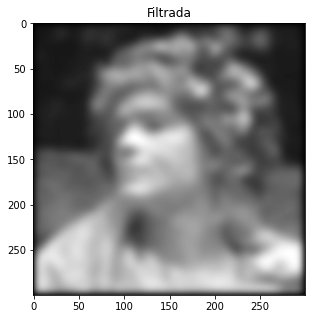

In [13]:
#Exibição Recursiva 01
A = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0) #Nova Imagem Alvo
plt.imshow(A,"gray")
plt.title("Nova imagem para testar:")
plt.show()
Nits=7 #Número de iteração
Fsize=7 #Dimensão do Kernel (Input)
Alin, Acol = A.shape #Dimensões da Imagem
Fkernel = np.ones([Fsize,Fsize]) #Kernel preenchido
central = m.floor((Fsize/2))
C = np.zeros((Alin + central * 2, Acol + central * 2)) #Cria uma imagem com padding
for nit in range(Nits):
    print("Iteração -> {}".format(nit+1))
    C[(0 + central):(Alin + central), (0 + central):(Acol + central)] = A.copy() #Cria uma cópia de A com padding    
    valsum = 0
    D = np.zeros(A.shape)
    for j in range((0), Alin):    
        for k in range((0), Acol):
                # Run kernel in one matrix's elements
            for kl in range(0, Fsize):
                for kk in range(0, Fsize):
                    valsum = (C[j + kl, k + kk] * Fkernel[kl, kk]) + valsum

            value = m.ceil((valsum / (Fsize * Fsize)))
            valsum = 0
            D[j, k] = value

    D = np.uint8(D)
    if nit == 0:
        fig1 = plt.figure(1)
        fig1.set_figheight(5)
        fig1.set_figwidth(5)
        plt.imshow(A,"gray")
        plt.title("Original")
        plt.show()
    #Figura Filtrada
    fig3 = plt.figure(3)
    fig3.set_figheight(5)
    fig3.set_figwidth(5)
    plt.imshow(D,"gray")
    plt.title("Filtrada")
    plt.show()
    A=D.copy()

Na figura ("glitch.jpg"), o efeito positivo do filtro fica evidente. 

A imagem apresenta efeitos de ruídos para seu propósito artístico. As linhas horizontais presente no fundo e suas 4 regiões, de diferentes tons, acabam por ficar mais suavizadas. Apesar do visual borrado, os efeitos de ruído nas formas geométricas também aparecem com menos intensidade.

No caso do uso de uma máscara 7x7, com sete iterações, as formas geométricas, apesar de ficarem muito borradas aos olhos humanos, apresentam os feitos de ruído mais atenuados, o que pode favorecer outros dispositivos de processamento digital de imagem a reconhecerem essas formas como círculo, triângulo e quadrado.

Quanto à figura "kodimnoisy300.jpg", o ruído é bastante melhorado na segunda iteração, e o uso de mais iterações mostra que apesar da recuperação do ruído, a imagem ficará excessivamente borrada a ponto de prejudicar suas características.

### Conclusões